In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('Data/활성화지역진단 결과_2022-06-11 (1).xls')

In [4]:
df

,시도명,시군구명,최종 선정지역,인구사회,산업경제,물리환경,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율
0,서울특별시,서울특별시 종로구,서울특별시 종로구,O,O,O,-45.047,2,-2.564,4,76.602
1,서울특별시,서울특별시 중구,서울특별시 중구,O,O,O,-43.708,2,-7.973,3,83.795
2,서울특별시,서울특별시 용산구,서울특별시 용산구,O,X,O,-34.927,4,-1.781,2,82.572
3,서울특별시,서울특별시 성동구,서울특별시 성동구,O,X,O,-31.230,1,2.660,0,80.584
4,서울특별시,서울특별시 광진구,서울특별시 광진구,X,X,O,-8.694,2,-1.620,2,71.326
...,...,...,...,...,...,...,...,...,...,...,...
191,경상남도,경상남도 함양군,경상남도 함양군,O,X,O,-46.142,5,0.359,1,59.075
192,경상남도,경상남도 거창군,경상남도 거창군,O,X,O,-34.529,2,1.128,1,64.600
193,경상남도,경상남도 합천군,경상남도 합천군,O,O,O,-55.243,5,-5.056,2,71.404
194,제주특별자치도,제주특별자치도 제주시,제주특별자치도 제주시,X,X,O,9.994,0,4.473,0,51.365


In [5]:
df = df.replace('O', 1) #O를 1로
df = df.replace('X', 0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도명        196 non-null    object 
 1   시군구명       196 non-null    object 
 2   최종 선정지역    196 non-null    object 
 3   인구사회       196 non-null    int64  
 4   산업경제       196 non-null    int64  
 5   물리환경       196 non-null    int64  
 6   과거대비인구변화   196 non-null    float64
 7   최근인구변화     196 non-null    int64  
 8   과거대비사업체변화  196 non-null    float64
 9   최근사업체변화    196 non-null    int64  
 10  노후건축물비율    196 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 17.0+ KB


In [7]:
df.columns

Index(['시도명', '시군구명', '최종 선정지역', '인구사회', '산업경제', '물리환경', '과거대비인구변화', '최근인구변화',
       '과거대비사업체변화', '최근사업체변화', '노후건축물비율'],
      dtype='object')

In [8]:
df2 = pd.read_csv('Data/국토교통부_잠재력지표_2021.csv', encoding='euc-kr')
df_act = pd.read_csv('Data/국토교통부_활성화지역진단지표시군구_2021.csv', encoding='euc-kr')

In [9]:
idx_19 = df2[df2['연도'] != 2019].index
df2 = df2.drop(idx_19)

In [10]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 257 to 2496
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   연도              229 non-null    int64  
 2   시군구명            229 non-null    object 
 3   대졸인구비율          0 non-null      float64
 4   대졸인구비율등급        0 non-null      float64
 5   여성종사자비율         229 non-null    float64
 6   여성종사자비율등급       229 non-null    float64
 7   20세미만인구성장률      229 non-null    float64
 8   20세미만인구성장률등급    229 non-null    float64
 9   투표율             0 non-null      float64
 10  투표율등급           0 non-null      float64
 11  재정자립도           229 non-null    float64
 12  재정자립도등급         229 non-null    float64
 13  경제활동인구대비종사자수    229 non-null    float64
 14  경제활동인구대비종사자수등급  229 non-null    float64
 15  1인당지역내총생산       0 non-null      float64
 16  1인당지역내총생산등급     0 non-null      float64
 17  특허출원건수          229 non-null    

In [11]:
idx_19 = df_act[df_act['연도'] != 2019].index
df_act = df_act.drop(idx_19)

In [12]:
len(df_act)

229

In [13]:
df_act = df_act.drop(['시도코드', '시도명', '연도', '기준연도'], axis=1)

In [14]:
df1 = df[['인구사회', '시군구명']]

In [15]:
df_new = pd.merge(df1, df2, how='outer', on=['시군구명'])

In [16]:
df_new=pd.merge(df_act, df_new, how='outer', on=['시군구코드'])

In [17]:
df_new['인구사회'] = df_new['인구사회'].fillna(0)

In [18]:
df_new['시도명'] =[""]*len(df_new)


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   시군구명_x          229 non-null    object 
 2   과거대비인구변화        228 non-null    float64
 3   최근인구변화          228 non-null    float64
 4   과거대비사업체변화       229 non-null    float64
 5   최근사업체변화         229 non-null    float64
 6   노후건축물비율         229 non-null    float64
 7   인구사회            229 non-null    float64
 8   시군구명_y          229 non-null    object 
 9   연도              229 non-null    int64  
 10  대졸인구비율          0 non-null      float64
 11  대졸인구비율등급        0 non-null      float64
 12  여성종사자비율         229 non-null    float64
 13  여성종사자비율등급       229 non-null    float64
 14  20세미만인구성장률      229 non-null    float64
 15  20세미만인구성장률등급    229 non-null    float64
 16  투표율             0 non-null      float64
 17  투표율등급           0 non-null      flo

In [20]:
for i in range(len(df_new)):
    si = df_new.iloc[i, 1].split()
    df_new.iloc[i, 48] = si[0]

In [21]:
idx_sg = df_new[(df_new['시도명']=='서울특별시') | (df_new['시도명']=='경기도')].index
df_new.drop(idx_sg, inplace = True)

In [22]:
df_new=df_new.drop(['투표율', '투표율등급', '1인당지역내총생산', '1인당지역내총생산등급'], axis=1)

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           173 non-null    int64  
 1   시군구명_x          173 non-null    object 
 2   과거대비인구변화        172 non-null    float64
 3   최근인구변화          172 non-null    float64
 4   과거대비사업체변화       173 non-null    float64
 5   최근사업체변화         173 non-null    float64
 6   노후건축물비율         173 non-null    float64
 7   인구사회            173 non-null    float64
 8   시군구명_y          173 non-null    object 
 9   연도              173 non-null    int64  
 10  대졸인구비율          0 non-null      float64
 11  대졸인구비율등급        0 non-null      float64
 12  여성종사자비율         173 non-null    float64
 13  여성종사자비율등급       173 non-null    float64
 14  20세미만인구성장률      173 non-null    float64
 15  20세미만인구성장률등급    173 non-null    float64
 16  재정자립도           173 non-null    float64
 17  재정자립도등급         173 non-null    flo

In [24]:
df_new['1인당공원면적'] = df_new['1인당공원면적'].fillna(df_new.groupby(['시도명'])['1인당공원면적'].transform('mean'))
df_new['건축허가면적증감률'] = df_new['건축허가면적증감률'].fillna(df_new.groupby(['시도명'])['건축허가면적증감률'].transform('mean'))
df_new['폐기물재활용률'] = df_new['폐기물재활용률'].fillna(df_new.groupby(['시도명'])['폐기물재활용률'].transform('mean'))
df_new['1만인당사회복지시설수'] = df_new['1만인당사회복지시설수'].fillna(df_new.groupby(['시도명'])['1만인당사회복지시설수'].transform('mean'))
df_new['1만인당축제건수'] = df_new['1만인당축제건수'].fillna(df_new.groupby(['시도명'])['1만인당축제건수'].transform('mean'))
df_new['과거대비인구변화'] = df_new['과거대비인구변화'].fillna(df_new.groupby(['시도명'])['과거대비인구변화'].transform('mean'))
df_new['최근인구변화'] = df_new['최근인구변화'].fillna(df_new.groupby(['시도명'])['최근인구변화'].transform('mean'))


In [25]:
df_new=df_new.drop(['대졸인구비율', '대졸인구비율등급', '시군구명_y'], axis=1)

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           173 non-null    int64  
 1   시군구명_x          173 non-null    object 
 2   과거대비인구변화        172 non-null    float64
 3   최근인구변화          172 non-null    float64
 4   과거대비사업체변화       173 non-null    float64
 5   최근사업체변화         173 non-null    float64
 6   노후건축물비율         173 non-null    float64
 7   인구사회            173 non-null    float64
 8   연도              173 non-null    int64  
 9   여성종사자비율         173 non-null    float64
 10  여성종사자비율등급       173 non-null    float64
 11  20세미만인구성장률      173 non-null    float64
 12  20세미만인구성장률등급    173 non-null    float64
 13  재정자립도           173 non-null    float64
 14  재정자립도등급         173 non-null    float64
 15  경제활동인구대비종사자수    173 non-null    float64
 16  경제활동인구대비종사자수등급  173 non-null    float64
 17  특허출원건수          173 non-null    flo

In [27]:
df_new['1만인당사회복지시설수'] = df_new['1만인당사회복지시설수'].fillna(df_new['1만인당사회복지시설수'].mean())
df_new['폐기물재활용률'] = df_new['폐기물재활용률'].fillna(df_new['폐기물재활용률'].mean())
df_new['건축허가면적증감률'] = df_new['건축허가면적증감률'].fillna(df_new['건축허가면적증감률'].mean())
df_new['과거대비인구변화'] = df_new['과거대비인구변화'].fillna(df_new['과거대비인구변화'].mean())
df_new['최근인구변화'] = df_new['최근인구변화'].fillna(df_new['최근인구변화'].mean())



In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           173 non-null    int64  
 1   시군구명_x          173 non-null    object 
 2   과거대비인구변화        173 non-null    float64
 3   최근인구변화          173 non-null    float64
 4   과거대비사업체변화       173 non-null    float64
 5   최근사업체변화         173 non-null    float64
 6   노후건축물비율         173 non-null    float64
 7   인구사회            173 non-null    float64
 8   연도              173 non-null    int64  
 9   여성종사자비율         173 non-null    float64
 10  여성종사자비율등급       173 non-null    float64
 11  20세미만인구성장률      173 non-null    float64
 12  20세미만인구성장률등급    173 non-null    float64
 13  재정자립도           173 non-null    float64
 14  재정자립도등급         173 non-null    float64
 15  경제활동인구대비종사자수    173 non-null    float64
 16  경제활동인구대비종사자수등급  173 non-null    float64
 17  특허출원건수          173 non-null    flo

In [29]:
df_new.rename(columns={'시군구명_x' : '시군구명'}, inplace=True)
df_new = df_new.drop(['연도', '시도명', '시군구코드'], axis=1)
# df_new.set_index('시군구명', inplace=True)

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구명            173 non-null    object 
 1   과거대비인구변화        173 non-null    float64
 2   최근인구변화          173 non-null    float64
 3   과거대비사업체변화       173 non-null    float64
 4   최근사업체변화         173 non-null    float64
 5   노후건축물비율         173 non-null    float64
 6   인구사회            173 non-null    float64
 7   여성종사자비율         173 non-null    float64
 8   여성종사자비율등급       173 non-null    float64
 9   20세미만인구성장률      173 non-null    float64
 10  20세미만인구성장률등급    173 non-null    float64
 11  재정자립도           173 non-null    float64
 12  재정자립도등급         173 non-null    float64
 13  경제활동인구대비종사자수    173 non-null    float64
 14  경제활동인구대비종사자수등급  173 non-null    float64
 15  특허출원건수          173 non-null    float64
 16  특허출원건수등급        173 non-null    float64
 17  1인당주민세          173 non-null    flo

In [31]:
df_new.drop(df_new.columns[range(8,38,2)], axis=1, inplace=True)

In [32]:
df_new

,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,0.91,202.61,-0.210000,2.03,77.030000,58.000000,35.57,1.16,6.0,1.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,3.02,67.65,-9.950000,-0.11,74.410000,41.143643,30.89,0.23,79.0,6.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,0.84,204.83,-41.550000,-1.15,79.500000,92.860000,23.80,1.01,6.0,1.0
5,충청남도 서천군,-51.49,5.0,2.50,1.0,57.18,1.0,47.52,-5.09,13.09,...,1.94,99.73,0.303861,-1.09,87.137152,71.030000,17.66,1.61,18.0,1.0
6,경상남도 함안군,-9.07,4.0,4.24,1.0,32.75,1.0,29.15,-4.97,25.42,...,1.64,82.41,39.540000,-1.52,87.360000,58.770000,14.09,0.16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,충청북도 증평군,-12.12,1.0,4.11,0.0,54.44,0.0,39.32,-3.81,17.63,...,3.40,113.31,-6.710000,0.10,84.200000,41.143643,39.61,0.55,13.0,1.0
223,충청남도 부여군,-49.99,5.0,-1.59,2.0,70.87,1.0,44.41,-8.30,14.33,...,0.27,86.54,0.303861,-0.95,87.137152,77.240000,14.03,0.47,11.0,1.0
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,0.81,46.99,-38.450000,0.51,80.990000,21.760000,16.71,0.14,42.0,4.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,0.82,175.39,26.180000,-1.17,95.080000,41.143643,29.42,1.44,16.0,1.0


In [33]:
from sklearn.model_selection import train_test_split

feature_columns = df_new.columns.difference(['인구사회', '시군구명'])

X = df_new[feature_columns]
y = df_new['인구사회']

In [34]:
import statsmodels.api as sm

full_model = sm.OLS(y, X)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   인구사회   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              90.39
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                    1.92e-75
Time:                        16:59:18   Log-Likelihood:                          7.2356
No. Observations:                 173   AIC:                                      29.53
Df Residuals:                     151   BIC:                                      98.90
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
1만인당공무원수        -0.0007      0.001     -1.339      0.183      -0.002       0.000
1만인당문화체육시설수      0.0003      0.002      0.159      0.874      -0.003       0.003
1만인당사회복지시설수      0.0005      0.001      0.647      0.519      -0.001       0.002
1만인당축제건수         0.0199      0.056      0.354      0.724      -0.091       0.131
1인당공원면적         -0.0023      0.001     -2.007      0.047      -0.005   -3.56e-05
1인당주민세          -0.0007      0.002     -0.422      0.674      -0.004       0.002
20세미만인구성장률       0.0151      0.012      1.267      0.207      -0.008       0.039
건축허가면적증감률      4.27e-06      0.000      0.012      0.991      -0.001       0.001
경제활동인구대비종사자수     0.3254      0.153      2.126      0.035       0.023       0.628
과거대비사업체변화        0.0149      0.010      1.507      0.134      -0.005       0.035
과거대비인구변화        -0.0041      0.002     -2.476      0.014      -0.007      -0.001
노후건축물비율          0.0011      0.002      0.495      0.621      -0.003       0.006
도로밀도            -0.0183      0.010     -1.752      0.082      -0.039       0.002
비영리단체수           0.0010      0.000      1.994      0.048    8.89e-06       0.002
비영리단체수등급        -0.0165      0.018     -0.901      0.369      -0.053       0.020
여성종사자비율          0.0026      0.004      0.651      0.516      -0.005       0.010
재정자립도           -0.0070      0.003     -2.110      0.037      -0.013      -0.000
주민등록인구전출입률      -0.0379      0.020     -1.850      0.066      -0.078       0.003
최근사업체변화          0.0104      0.037      0.278      0.781      -0.063       0.084
최근인구변화           0.1282      0.015      8.355      0.000       0.098       0.158
특허출원건수       -2.667e-05   3.06e-05     -0.872      0.384   -8.71e-05    3.37e-05
폐기물재활용률          0.0026      0.002      1.323      0.188      -0.001       0.006
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.279
Skew:                          -0.090   Prob(JB):                        0.870
Kurtosis:                       2.922   Cond. No.                     7.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

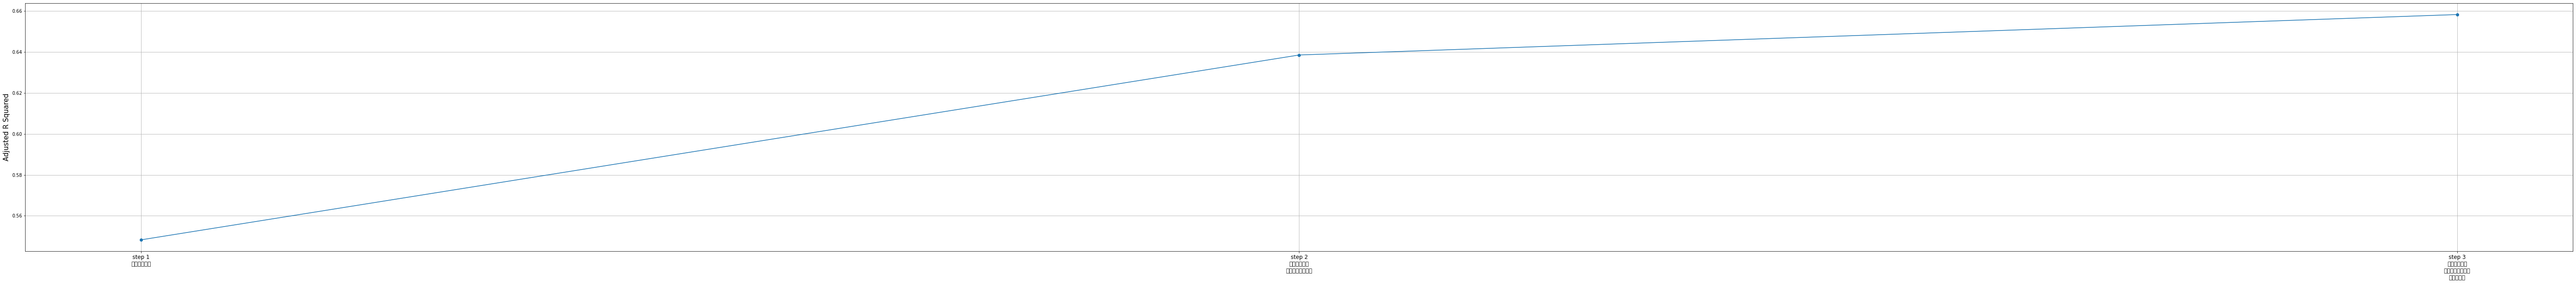

In [35]:
def stepwise_feature_selection(X_train, y_train, variables=X.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X, y)

In [36]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_variables]))).fit(disp=0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   인구사회   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           7.55e-40
Time:                        16:59:22   Log-Likelihood:                -3.1368
No. Observations:                 173   AIC:                             14.27
Df Residuals:                     169   BIC:                             26.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4523      0.090      5.048      0.0

In [37]:
df_new

,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,0.91,202.61,-0.210000,2.03,77.030000,58.000000,35.57,1.16,6.0,1.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,3.02,67.65,-9.950000,-0.11,74.410000,41.143643,30.89,0.23,79.0,6.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,0.84,204.83,-41.550000,-1.15,79.500000,92.860000,23.80,1.01,6.0,1.0
5,충청남도 서천군,-51.49,5.0,2.50,1.0,57.18,1.0,47.52,-5.09,13.09,...,1.94,99.73,0.303861,-1.09,87.137152,71.030000,17.66,1.61,18.0,1.0
6,경상남도 함안군,-9.07,4.0,4.24,1.0,32.75,1.0,29.15,-4.97,25.42,...,1.64,82.41,39.540000,-1.52,87.360000,58.770000,14.09,0.16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,충청북도 증평군,-12.12,1.0,4.11,0.0,54.44,0.0,39.32,-3.81,17.63,...,3.40,113.31,-6.710000,0.10,84.200000,41.143643,39.61,0.55,13.0,1.0
223,충청남도 부여군,-49.99,5.0,-1.59,2.0,70.87,1.0,44.41,-8.30,14.33,...,0.27,86.54,0.303861,-0.95,87.137152,77.240000,14.03,0.47,11.0,1.0
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,0.81,46.99,-38.450000,0.51,80.990000,21.760000,16.71,0.14,42.0,4.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,0.82,175.39,26.180000,-1.17,95.080000,41.143643,29.42,1.44,16.0,1.0


In [38]:
from sklearn.preprocessing import StandardScaler

data = df_new[['최근인구변화', '과거대비인구변화',  '재정자립도']]

std = StandardScaler()
std_data = std.fit_transform(data)


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=None)

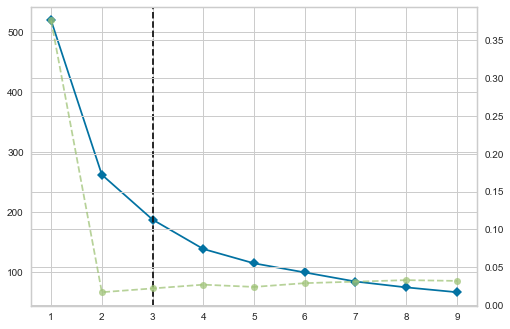

In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(std_data)

In [40]:
model = KMeans(n_clusters =3, random_state = 20)

In [41]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(std_data)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_new['cluster'] = model.fit_predict(std_data)

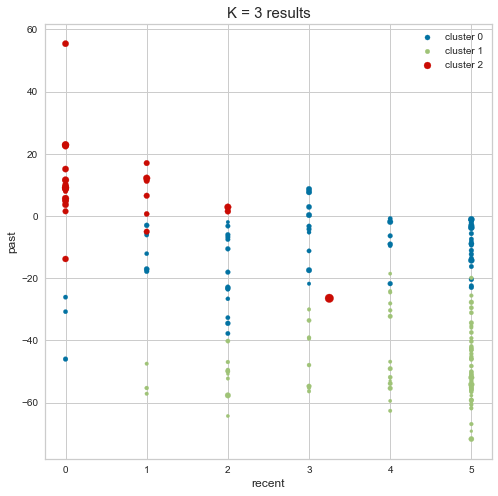

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(3):
    plt.scatter(df_new.loc[df_new['cluster'] == i, '최근인구변화'], df_new.loc[df_new['cluster'] == i, '과거대비인구변화'],
                df_new.loc[df_new['cluster'] == i, '재정자립도'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('recent', size = 12)
plt.ylabel('past', size = 12)
plt.show()

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

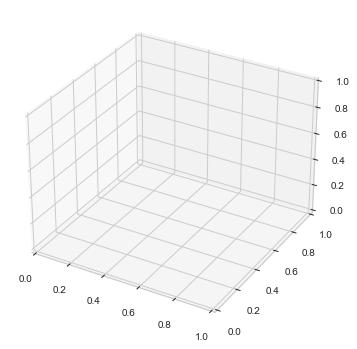

In [44]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

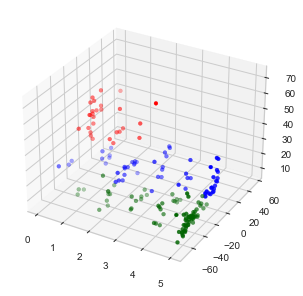

In [64]:


# ax.scatter(df_new.loc[df_new['cluster'] == i, '최근인구변화'], df_new.loc[df_new['cluster'] == i, '과거대비인구변화'],
#                 df_new.loc[df_new['cluster'] == i, '재정자립도'],
#                 label = 'cluster ' + str(i), color = 'r', alpha = 0.5)


fig = plt.figure(figsize=(5, 5))

  # 3D axes를 만들기 위해 projection=’3d’ 키워드를 입력해줍니다.
ax = fig.gca(projection='3d')

  # scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
  # 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
  # marker = 점의 형태
  # s = 점의 크기
  # c = 점의 색깔
ax.scatter(df_new.loc[df_new['cluster'] == 1, '최근인구변화'], df_new.loc[df_new['cluster'] == 1, '과거대비인구변화'],
                df_new.loc[df_new['cluster'] == 1, '재정자립도'], marker='o', s=15, c='darkgreen')
ax.scatter(df_new.loc[df_new['cluster'] == 2, '최근인구변화'], df_new.loc[df_new['cluster'] == 2, '과거대비인구변화'],
                df_new.loc[df_new['cluster'] == 2, '재정자립도'], marker='o', s=15, c='red')
ax.scatter(df_new.loc[df_new['cluster'] == 0, '최근인구변화'], df_new.loc[df_new['cluster'] == 0, '과거대비인구변화'],
                df_new.loc[df_new['cluster'] == 0, '재정자립도'], marker='o', s=15, c='blue')


plt.show()

In [66]:
df_new.groupby('cluster')[['최근인구변화', '과거대비인구변화', '재정자립도']].mean()

#0 : 활성화 중간
#1 : 활성화 스레기
#2 : 활성화 굿굿

,최근인구변화,과거대비인구변화,재정자립도
cluster,,,
0,3.186441,-11.912881,23.202712
1,4.197674,-47.822791,15.905349
2,0.473214,8.441798,38.358571


In [69]:
df_new['cluster'].replace(0, '중', inplace = True)
df_new['cluster'].replace(1, '하', inplace = True)
df_new['cluster'].replace(2, '상', inplace = True)

In [70]:
df_new['cluster'].replace('하', 0, inplace = True)
df_new['cluster'].replace('중', 1, inplace = True)
df_new['cluster'].replace('상', 2, inplace = True)

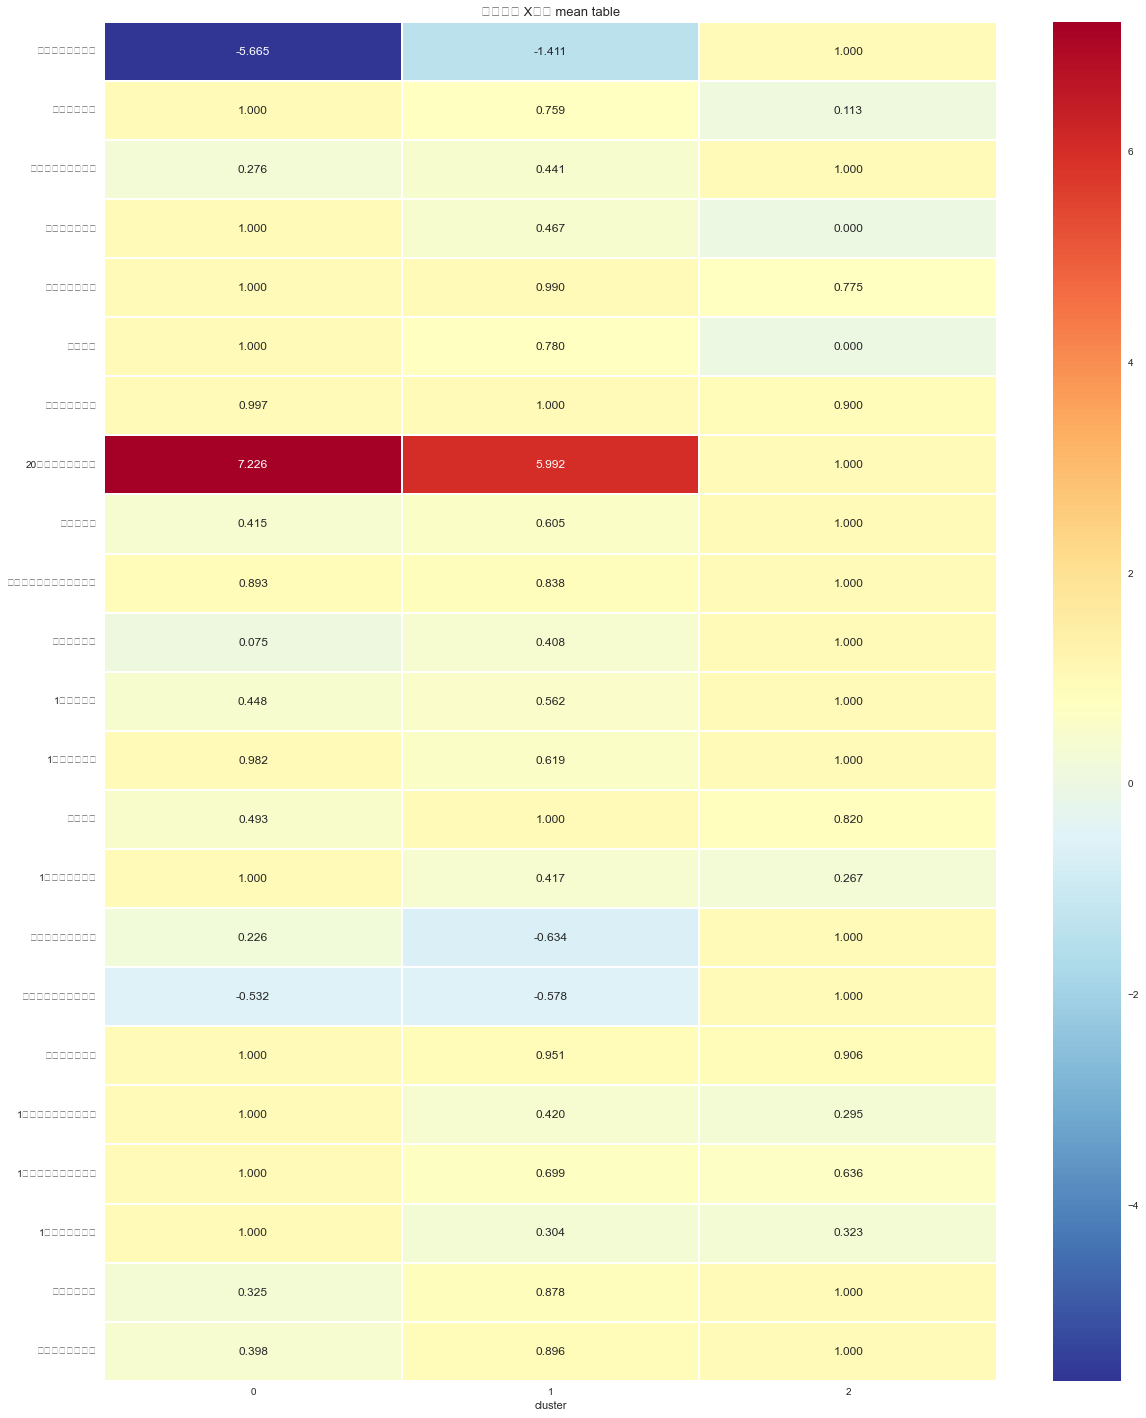

In [71]:
import seaborn as sns

temp = df_new.groupby(['cluster']).mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)

plt.figure(figsize = (20,25))
annot_kws={ 'fontsize' : 12}
sns.heatmap(mean_table,
            annot=True,
            fmt='.3f',
            linewidths=0.1,
            annot_kws = annot_kws,
            cmap='RdYlBu_r')

plt.title('클러스터 X변수 mean table', fontsize = 13)
plt.show()
            

<AxesSubplot:xlabel='재정자립도', ylabel='cluster'>

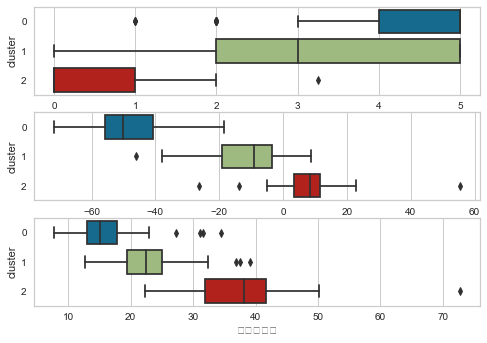

In [72]:
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=3)
sns.boxplot(data= df_new, y='cluster', x = '최근인구변화', orient = 'h', ax = ax1)
sns.boxplot(data= df_new, y='cluster', x = '과거대비인구변화', orient = 'h', ax = ax2)
sns.boxplot(data= df_new, y='cluster', x = '재정자립도', orient = 'h', ax = ax3)

In [73]:
df_new.to_csv('clusterafter.csv')

In [76]:
import folium
import json

In [77]:
geo_path = 'Data/sig_wgs84.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [78]:
df_sg = df2[['시군구명', '시군구코드']]

In [79]:
df_map = pd.merge(df_sg, df_new, how='inner', on='시군구명')

In [80]:
df_map

,시군구명,시군구코드,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,...,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급,cluster
0,부산광역시 해운대구,26350,-1.23,5.0,2.46,0.0,78.33,1.0,50.39,-4.55,...,26.67,61.86,-0.75,94.45,8.250000,13.49,0.080000,61.0,5.0,1
1,부산광역시 사상구,26530,-20.41,5.0,-0.59,1.0,73.54,1.0,38.47,-6.18,...,33.81,-53.87,-2.22,92.82,7.600000,15.56,0.050000,40.0,4.0,1
2,대구광역시 남구,27200,-42.62,5.0,-0.36,1.0,81.87,1.0,53.34,-6.15,...,45.66,-76.26,-1.21,94.93,8.990000,12.98,0.340000,68.0,6.0,0
3,인천광역시 강화군,28710,-26.11,0.0,3.60,1.0,46.90,1.0,46.98,-1.36,...,86.87,29.67,1.06,92.43,52.810000,31.09,0.940000,31.0,3.0,1
4,광주광역시 북구,29170,-5.25,3.0,1.10,1.0,65.80,1.0,44.24,-4.41,...,19.53,-8.16,-1.49,90.67,11.390000,17.97,0.073333,192.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,전라남도 장성군,46880,-50.03,2.0,4.62,0.0,58.22,1.0,36.51,-5.05,...,152.03,-40.71,0.38,88.71,41.143643,51.66,1.480000,10.0,1.0,0
169,전라남도 완도군,46890,-57.77,5.0,2.01,0.0,67.06,1.0,44.87,-4.28,...,158.40,21.45,-0.95,80.48,41.143643,23.51,0.660000,11.0,1.0,0
170,전라남도 신안군,46910,-69.21,5.0,-3.68,2.0,73.35,1.0,39.68,-7.07,...,231.95,-26.41,-1.47,89.13,41.143643,29.47,0.880000,4.0,1.0,0
171,경상북도 봉화군,47920,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,...,204.83,-41.55,-1.15,79.50,92.860000,23.80,1.010000,6.0,1.0,0


In [81]:
df_map['시군구코드'] = df_map.시군구코드.map(lambda x : str(x).zfill(5))

In [82]:
df_map.drop('시군구명', axis=1, inplace=True)

In [83]:
df_map

,시군구코드,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급,cluster
0,26350,-1.23,5.0,2.46,0.0,78.33,1.0,50.39,-4.55,29.12,...,26.67,61.86,-0.75,94.45,8.250000,13.49,0.080000,61.0,5.0,1
1,26530,-20.41,5.0,-0.59,1.0,73.54,1.0,38.47,-6.18,23.22,...,33.81,-53.87,-2.22,92.82,7.600000,15.56,0.050000,40.0,4.0,1
2,27200,-42.62,5.0,-0.36,1.0,81.87,1.0,53.34,-6.15,15.37,...,45.66,-76.26,-1.21,94.93,8.990000,12.98,0.340000,68.0,6.0,0
3,28710,-26.11,0.0,3.60,1.0,46.90,1.0,46.98,-1.36,19.18,...,86.87,29.67,1.06,92.43,52.810000,31.09,0.940000,31.0,3.0,1
4,29170,-5.25,3.0,1.10,1.0,65.80,1.0,44.24,-4.41,16.51,...,19.53,-8.16,-1.49,90.67,11.390000,17.97,0.073333,192.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,46880,-50.03,2.0,4.62,0.0,58.22,1.0,36.51,-5.05,17.97,...,152.03,-40.71,0.38,88.71,41.143643,51.66,1.480000,10.0,1.0,0
169,46890,-57.77,5.0,2.01,0.0,67.06,1.0,44.87,-4.28,11.37,...,158.40,21.45,-0.95,80.48,41.143643,23.51,0.660000,11.0,1.0,0
170,46910,-69.21,5.0,-3.68,2.0,73.35,1.0,39.68,-7.07,8.55,...,231.95,-26.41,-1.47,89.13,41.143643,29.47,0.880000,4.0,1.0,0
171,47920,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,204.83,-41.55,-1.15,79.50,92.860000,23.80,1.010000,6.0,1.0,0


In [84]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

m.choropleth(
    geo_data=geo_str,
    name='활성화지표',
    data=df_map,
    columns=['시군구코드', 'cluster'],
    key_on='feature.properties.SIG_CD',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'activation'
)

# https://blog.naver.com/yun9706/222454846442

In [85]:
folium.LayerControl().add_to(m)

# Save to html
m.save('folium_kr_인구사회.html')